In [51]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
ms = pd.read_csv('Microsoft_Stock.csv')

In [53]:
print(ms.head())

                Date   Open   High    Low  Close    Volume
0  4/1/2015 16:00:00  40.60  40.76  40.31  40.72  36865322
1  4/2/2015 16:00:00  40.66  40.74  40.12  40.29  37487476
2  4/6/2015 16:00:00  40.34  41.78  40.18  41.55  39223692
3  4/7/2015 16:00:00  41.61  41.91  41.31  41.53  28809375
4  4/8/2015 16:00:00  41.48  41.69  41.04  41.42  24753438


In [54]:
ms.iloc[0,0]

'4/1/2015 16:00:00'

In [55]:
ms['Date'] = pd.to_datetime(ms['Date'])

In [56]:
ms.set_index('Date', inplace=True)

In [57]:
ms.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [58]:
print(ms.shape)

(1511, 5)


In [59]:
print(ms.tail())

                       Open    High     Low   Close    Volume
Date                                                         
2021-03-25 16:00:00  235.30  236.94  231.57  232.34  34061853
2021-03-26 16:00:00  231.55  236.71  231.55  236.48  25479853
2021-03-29 16:00:00  236.59  236.80  231.88  235.24  25227455
2021-03-30 16:00:00  233.53  233.85  231.10  231.85  24792012
2021-03-31 16:00:00  232.91  239.10  232.39  235.77  43623471


In [60]:
print(ms.describe())

              Open         High          Low        Close        Volume
count  1511.000000  1511.000000  1511.000000  1511.000000  1.511000e+03
mean    107.385976   108.437472   106.294533   107.422091  3.019863e+07
std      56.691333    57.382276    55.977155    56.702299  1.425266e+07
min      40.340000    40.740000    39.720000    40.290000  1.016120e+05
25%      57.860000    58.060000    57.420000    57.855000  2.136213e+07
50%      93.990000    95.100000    92.920000    93.860000  2.662962e+07
75%     139.440000   140.325000   137.825000   138.965000  3.431962e+07
max     245.030000   246.130000   242.920000   244.990000  1.352271e+08


In [61]:
# Selecting all price information of microsoft in 2016
# Selection by label for row data 
ms_2016 = ms.loc['2016-01-01':'2016-12-31']
print(ms_2016)

                      Open   High    Low  Close    Volume
Date                                                     
2016-01-04 16:00:00  54.32  54.80  53.39  54.80  53777963
2016-01-05 16:00:00  54.93  55.39  54.54  55.05  34079674
2016-01-06 16:00:00  54.32  54.40  53.64  54.05  39518863
2016-01-07 16:00:00  52.70  53.49  52.07  52.17  56564852
2016-01-08 16:00:00  52.37  53.28  52.15  52.33  48753969
...                    ...    ...    ...    ...       ...
2016-12-23 16:00:00  63.45  63.54  62.80  63.24  12403819
2016-12-27 16:00:00  63.21  64.07  63.21  63.28  11763173
2016-12-28 16:00:00  63.40  63.40  62.83  62.99  14653348
2016-12-29 16:00:00  62.86  63.20  62.73  62.90  10250582
2016-12-30 16:00:00  62.96  62.99  62.03  62.14  25579908

[252 rows x 5 columns]


In [62]:
# Selection by label for row data 
# printing price of microsoft on date 2016-03-16 
price_16 = ms.loc['2016-03-16']
print(price_16)

                      Open  High   Low  Close    Volume
Date                                                   
2016-03-16 16:00:00  53.45  54.6  53.4  54.35  31691742


In [63]:
# Selection by position for a row of data
#print opening price of first row
print(ms.iloc[0,0])

40.6


In [64]:
#print opening price of last row
print(ms.iloc[-1,0])

232.91


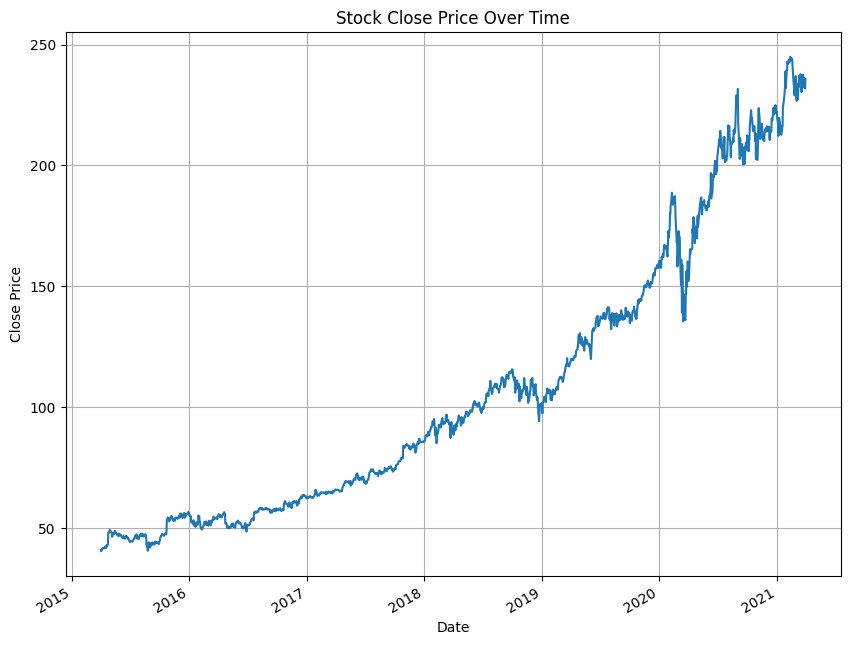

In [65]:
# Plotting stock data using plot() method
plt.figure(figsize=(10, 8))
ms['Close'].plot()
plt.title("Stock Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()


# Create a new column Price difference

In [66]:
ms['PriceDiff'] = ms['Close'].shift(-1) - ms['Close']
print(ms.head(5))

                      Open   High    Low  Close    Volume  PriceDiff
Date                                                                
2015-04-01 16:00:00  40.60  40.76  40.31  40.72  36865322      -0.43
2015-04-02 16:00:00  40.66  40.74  40.12  40.29  37487476       1.26
2015-04-06 16:00:00  40.34  41.78  40.18  41.55  39223692      -0.02
2015-04-07 16:00:00  41.61  41.91  41.31  41.53  28809375      -0.11
2015-04-08 16:00:00  41.48  41.69  41.04  41.42  24753438       0.06


In [67]:
#lets check price difference of Microsoft on 2016-01-05
ms['PriceDiff'].loc['2016-01-05']

Date
2016-01-05 16:00:00   -1.0
Name: PriceDiff, dtype: float64

# Create new column for daily return  

### Daily Return = PriceDiff / Close

In [68]:
ms['Return'] = ms['PriceDiff']/ms['Close']

In [69]:
# lets check return on 2015-04-01
print(ms['Return'].loc['2015-04-01'])

Date
2015-04-01 16:00:00   -0.01056
Name: Return, dtype: float64


# Create new column in dataframe using list comprehension - Direction 

### List comprehension means : if priceDiff > 0 , it's denoted as 1 else denoted as 0 

In [70]:
ms['Direction'] = [1 if ms['PriceDiff'].loc[ei] > 0 else 0 for ei in ms.index]

In [71]:
print('Price difference on {} is {}. direction is {}'.format('2015-04-01', ms['PriceDiff'].loc['2015-04-01'].iloc[0],ms['Direction'].loc['2015-04-01'].iloc[0]))

Price difference on 2015-04-01 is -0.4299999999999997. direction is 0


# Create new column using rolling window calc ( .rolling()) - Moving average

In [72]:
ms['ma50'] = ms['Close'].rolling(50).mean()

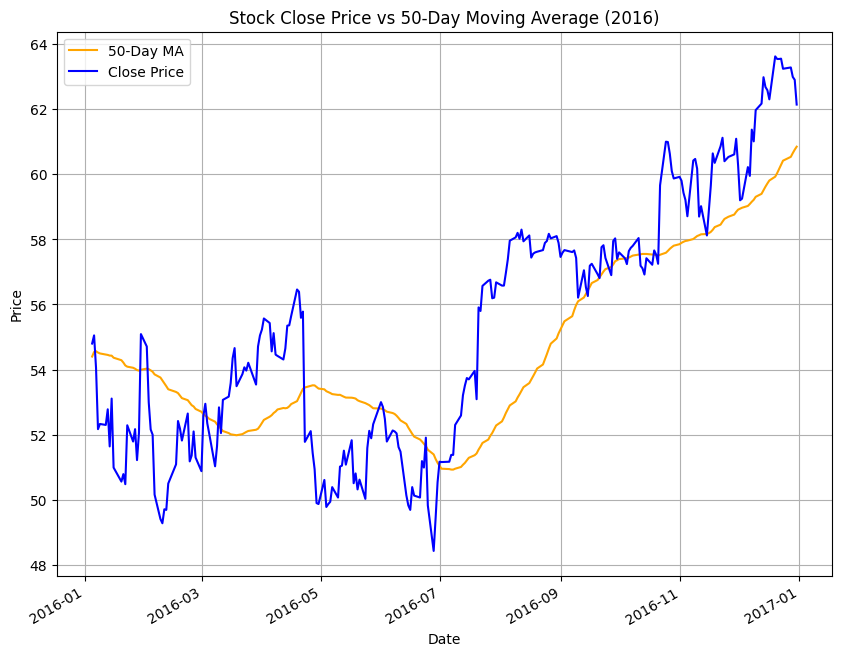

In [73]:
plt.figure(figsize=(10, 8))
ms['ma50'].loc['2016-01-01':'2016-12-31'].plot(label='50-Day MA', color='orange')
ms['Close'].loc['2016-01-01':'2016-12-31'].plot(label='Close Price', color='blue')
plt.title("Stock Close Price vs 50-Day Moving Average (2016)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()

# Building simple trading strategy 

#### 1. Munging stock data and adding 2 columns MA10 and MA50

In [74]:
ms['ma10'] = ms['Close'].rolling(10).mean()

In [75]:
# using dropna to remove "Not a Number" data
ms = ms.dropna()
ms.head()

,Open,High,Low,Close,Volume,PriceDiff,Return,Direction,ma50,ma10
Date,,,,,,,,,,
2015-06-11 16:00:00,46.66,46.92,46.13,46.44,27347758,-0.47,-0.010121,0,45.6266,46.479
2015-06-12 16:00:00,46.20,46.47,45.90,45.97,23930972,-0.49,-0.010659,0,45.7316,46.390
2015-06-15 16:00:00,45.45,45.65,45.02,45.48,33254517,0.35,0.007696,1,45.8354,46.215
2015-06-16 16:00:00,45.35,46.24,45.30,45.83,27070306,0.14,0.003055,1,45.9210,46.106
2015-06-17 16:00:00,45.73,46.07,45.36,45.97,28704061,0.75,0.016315,1,46.0098,46.018


#### 2. Adding new column "Shares" to make decisions based on strategy
##### if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

In [76]:
ms['Shares'] = [1 if ms.loc[ei,'ma10'] > ms.loc[ei,'ma50'] else 0 for ei in ms.index]
ms.tail()

,Open,High,Low,Close,Volume,PriceDiff,Return,Direction,ma50,ma10,Shares
Date,,,,,,,,,,,
2021-03-24 16:00:00,237.85,238.00,235.32,235.46,25620127,-3.12,-0.013251,0,233.5678,235.254,1
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,4.14,0.017819,1,233.9160,234.775,1
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,-1.24,-0.005244,0,234.3188,234.848,1
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,-3.39,-0.014411,0,234.7632,234.891,1
2021-03-30 16:00:00,233.53,233.85,231.10,231.85,24792012,3.92,0.016907,1,235.1472,234.305,0


### Add new column "Profit" using list comprehension, for any rows in ms, if shares=1,
### profit = close price of tomorrow - close price of today ,  otherwise profit is 0

In [77]:
ms['Close1'] = ms['Close'].shift(-1)
ms['Profit'] = [ms.loc[ei,'Close1'] - ms.loc[ei, 'Close'] if ms.loc[ei, 'Shares']==1 else 0 for ei in ms.index]


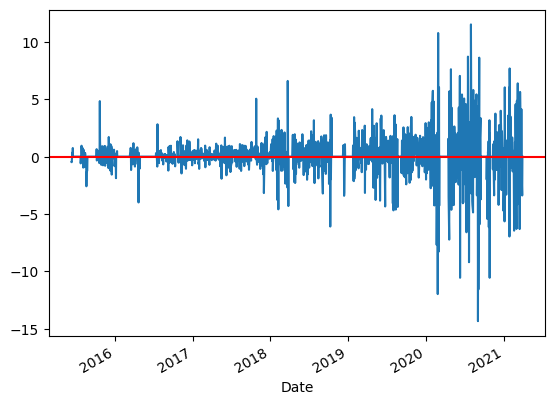

In [78]:
ms['Profit'].plot()
plt.axhline(y=0, color='red')

#### 3. Use .cumsum() to display our model's performance if we follow the strategy

In [79]:
#use .cumsum() to calculate the accumulated wealth over the period
ms['wealth'] = ms['Profit'].cumsum()
ms.tail()

,Open,High,Low,Close,Volume,PriceDiff,Return,Direction,ma50,ma10,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,,,
2021-03-24 16:00:00,237.85,238.00,235.32,235.46,25620127,-3.12,-0.013251,0,233.5678,235.254,1,232.34,-3.12,100.19
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,4.14,0.017819,1,233.9160,234.775,1,236.48,4.14,104.33
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,-1.24,-0.005244,0,234.3188,234.848,1,235.24,-1.24,103.09
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,-3.39,-0.014411,0,234.7632,234.891,1,231.85,-3.39,99.70
2021-03-30 16:00:00,233.53,233.85,231.10,231.85,24792012,3.92,0.016907,1,235.1472,234.305,0,NaN,0.00,99.70


Text(0.5, 1.0, 'Total money you win is 99.69999999999996')

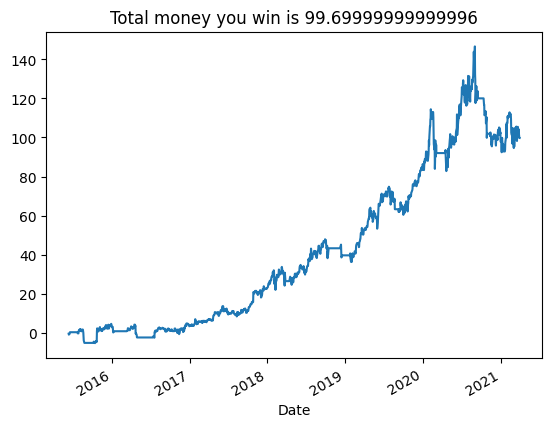

In [80]:
#plot wealth to show growth of profit over the period
ms['wealth'].plot()
plt.title('Total money you win is {}'.format(ms.loc[ms.index[-2], 'wealth']))

# Models of Stock Return 

In [81]:
import numpy as np

In [82]:
ms.head()

,Open,High,Low,Close,Volume,PriceDiff,Return,Direction,ma50,ma10,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,,,
2015-06-11 16:00:00,46.66,46.92,46.13,46.44,27347758,-0.47,-0.010121,0,45.6266,46.479,1,45.97,-0.47,-0.47
2015-06-12 16:00:00,46.20,46.47,45.90,45.97,23930972,-0.49,-0.010659,0,45.7316,46.390,1,45.48,-0.49,-0.96
2015-06-15 16:00:00,45.45,45.65,45.02,45.48,33254517,0.35,0.007696,1,45.8354,46.215,1,45.83,0.35,-0.61
2015-06-16 16:00:00,45.35,46.24,45.30,45.83,27070306,0.14,0.003055,1,45.9210,46.106,1,45.97,0.14,-0.47
2015-06-17 16:00:00,45.73,46.07,45.36,45.97,28704061,0.75,0.016315,1,46.0098,46.018,1,46.72,0.75,0.28


### Distribution of Log Return

In [83]:
#lets calculate the daily log return
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])

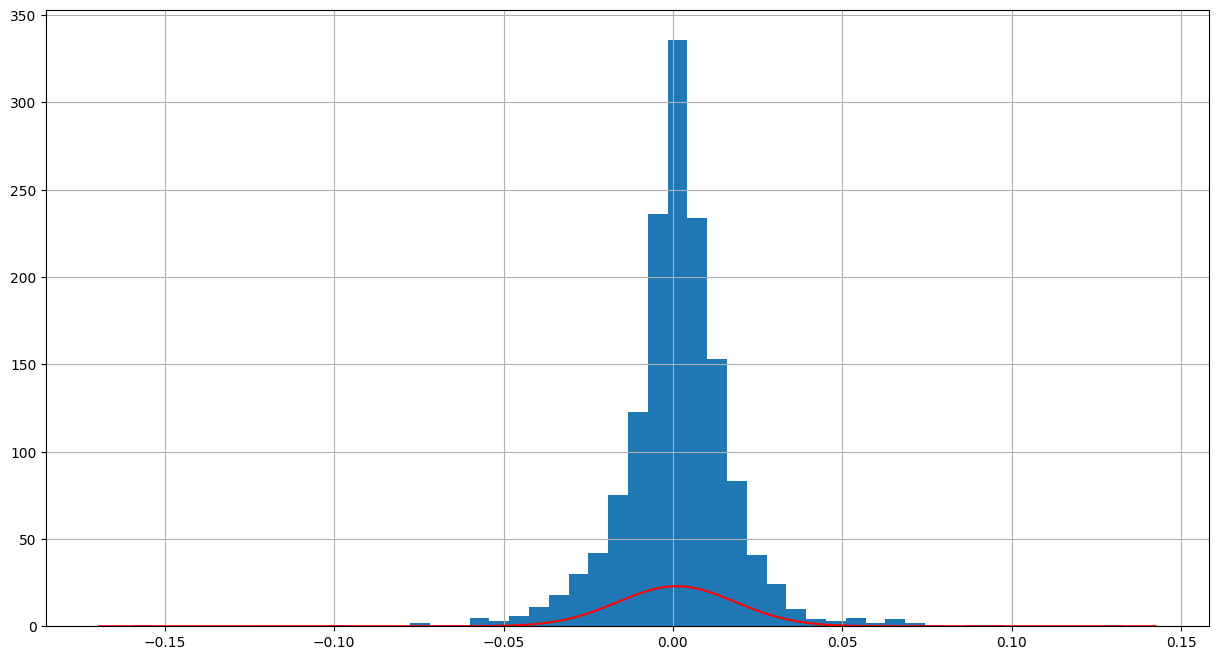

In [84]:
# plot histogram to show distribution of log return of microsoft's stock.
# you can see it is close to normal distribution
from scipy.stats import norm

mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(ms['LogReturn'].min()-0.01, ms['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

ms['LogReturn'].hist(bins=50, figsize=(15,8))
plt.plot(density['x'], density['pdf'], color='red') #this line is probability density func
plt.show()

### Calculate probability of stock price will drop over a certain percentage in a day

In [85]:
# probability that stock price of microsoft will drop over 5% in a day 
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability is ',prob_return1)

The Probability is  0.0016450048414312763


In [86]:
# probability of 10% drop
prob_return2 = norm.cdf(-0.1, mu, sigma)
print('The Probability is ',prob_return2)

The Probability is  3.0286798228432315e-09


### Calculate probability of stock price will drop over a certain percentage in a year

In [87]:
#drop over 40% in 360 days 
mu360 = 360 * mu
sigma360 = (360**0.5) * sigma
print('The probability of dropping over 40% in 360 days is ', norm.cdf(-0.4,mu360,sigma360))

The probability of dropping over 40% in 360 days is  0.00787848178755577


In [88]:
# drop over 20% in 360 days 
print('The probability of dropping over 20% in 360 days is ', norm.cdf(-0.2, mu360,sigma360))

The probability of dropping over 20% in 360 days is  0.03528756120223843


### Calculate Value at Risk ( VaR)

In [89]:
# Value at Risk
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk', VaR)

Single day value at risk -0.027495775034092507


In [90]:
# Quantile
# 5% quantile
print('5% quantile ',norm.ppf(0.05, mu, sigma))
# 25% quantile
print('25% quantile ',norm.ppf(0.25, mu, sigma))
#75% quantile
print('75% quantile ',norm.ppf(0.75, mu, sigma))
# 95% quantile
print('95% quantile ',norm.ppf(0.95, mu, sigma))


5% quantile  -0.027495775034092507
25% quantile  -0.010625222515238794
75% quantile  0.012827865602920685
95% quantile  0.029698418121774383


# Confidence Interval

In [91]:
from scipy.stats import norm

In [92]:
ms.head()

,Open,High,Low,Close,Volume,PriceDiff,Return,Direction,ma50,ma10,Shares,Close1,Profit,wealth,LogReturn
Date,,,,,,,,,,,,,,,
2015-06-11 16:00:00,46.66,46.92,46.13,46.44,27347758,-0.47,-0.010121,0,45.6266,46.479,1,45.97,-0.47,-0.47,-0.010172
2015-06-12 16:00:00,46.20,46.47,45.90,45.97,23930972,-0.49,-0.010659,0,45.7316,46.390,1,45.48,-0.49,-0.96,-0.010716
2015-06-15 16:00:00,45.45,45.65,45.02,45.48,33254517,0.35,0.007696,1,45.8354,46.215,1,45.83,0.35,-0.61,0.007666
2015-06-16 16:00:00,45.35,46.24,45.30,45.83,27070306,0.14,0.003055,1,45.9210,46.106,1,45.97,0.14,-0.47,0.003050
2015-06-17 16:00:00,45.73,46.07,45.36,45.97,28704061,0.75,0.016315,1,46.0098,46.018,1,46.72,0.75,0.28,0.016183


### Estimate average stock return with 90% confidence interval

In [95]:
# we will use log return for average stock return of microsoft

# lets build 90% confidence interval for log return
sample_size = ms['LogReturn'].shape[0]
sample_mean = ms['LogReturn'].mean()
sample_std = ms['LogReturn'].std(ddof=1)/sample_size**0.5
# Confidence level
confidence_level = 0.90
alpha = 1 - confidence_level
# left and right quantile
z_left = norm.ppf(alpha/2)
z_right = norm.ppf(1-alpha/2)
# upper and lower bound
interval_left = sample_mean+z_left*sample_std
interval_right = sample_mean+z_right*sample_std

In [98]:
# 90% confidence interval tells you that there will be 90% chance that the average stock return lies between "interval_left"
# and "interval_right".
print('90% confidence interval is ',(interval_left, interval_right))

90% confidence interval is  (np.float64(0.0003531574972708175), np.float64(0.001849485590411071))


# Hypothesis testing

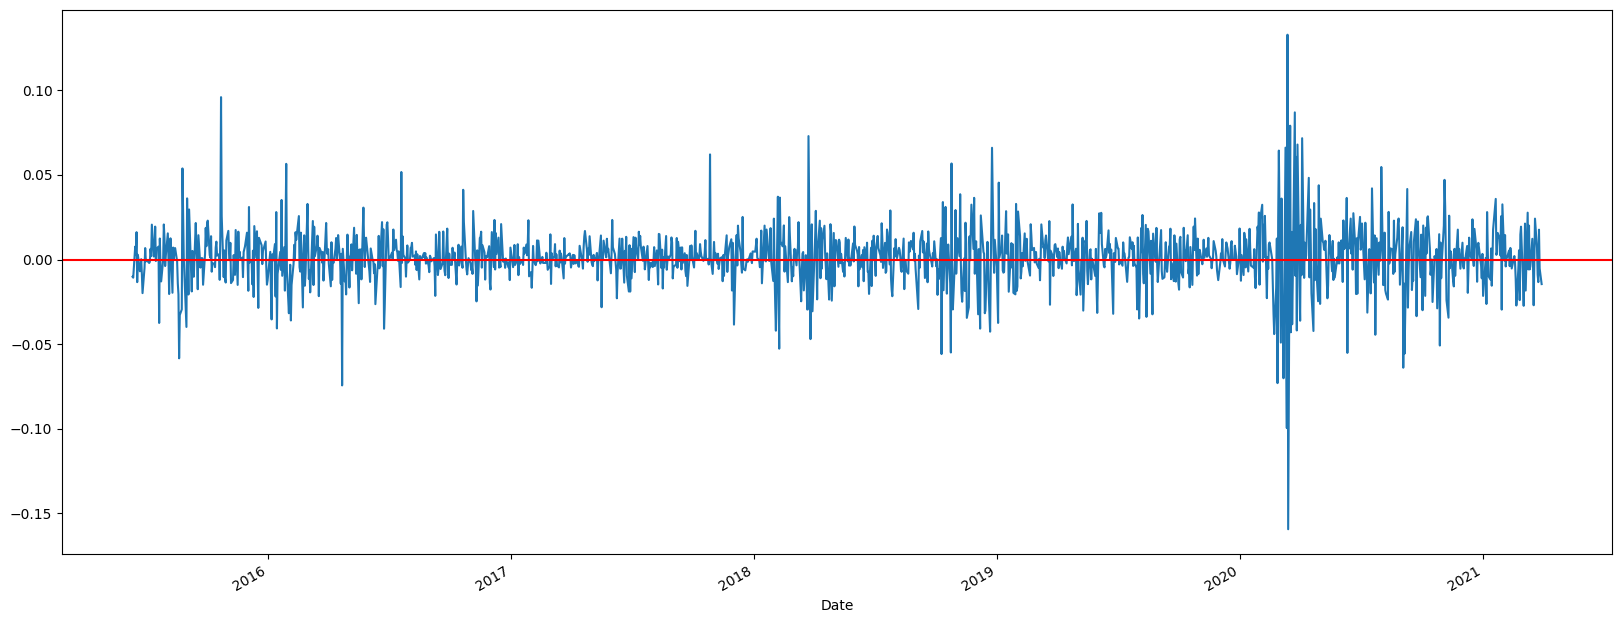

In [104]:
# Log return goes up and down during the period
ms['LogReturn'].plot(figsize=(20, 8))
plt.axhline(0, color='red')
plt.show()

## Steps involved in testing a claim by hypothesis testing

### Step 1 : Set hypothesis
#### Ho : u = 0
#### Ha : u |= 0

Ho means the average stock return is 0 
Ha means average stock return is not equal to 0

## Step 2: Calculate test statistic

In [105]:
sample_mean = ms['LogReturn'].mean()
sample_std = ms['LogReturn'].std(ddof=1)
n = ms['LogReturn'].shape[0]
# if sample size n is large enough , we can use z-distributiom, instead of t-distribution
#mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

2.4212774512905924


## Step 3: Set decision criteria

In [106]:
#confidence level
alpha = 0.05
zleft = norm.ppf(alpha/2, 0 , 1)
zright = -zleft # z-distribution is symmetric
print(zleft, zright)

-1.9599639845400545 1.9599639845400545


## Step 4: Make decision - shall we reject Ho

In [108]:
# this is 2 tail test
print('At significant level of {}, shall we reject : {}'.format(alpha, zhat>zright or zhat<zleft))

At significant level of 0.05, shall we reject : True


For one tailed test , step 1 and step 2 same . 

In [111]:
# step3 for one tail test 
alpha = 0.05
zright = norm.ppf(1-alpha,0,1)
print(zright)
print(zhat)

1.6448536269514722
2.4212774512905924


In [112]:
print('At significant level of {}, shall we reject : {}'.format(alpha, zhat>zright))

At significant level of 0.05, shall we reject : True


# An alternative method : p value

In [113]:
#step 3 p value

In [114]:
p = 1 - norm.cdf(zhat, 0 ,1)
print(p)

0.007733033929654742


In [115]:
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))

At significant level of 0.05, shall we reject: True
